In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, QuantileTransformer, LabelEncoder, OneHotEncoder, OrdinalEncoder

In [3]:
data = pd.read_csv('data/penguins_size.csv')
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
print(data.isnull().sum())

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


In [6]:
mean_impute_strategy = SimpleImputer()
median_impute_strategy = SimpleImputer(strategy="median")
mode_impute_strategy = SimpleImputer(strategy="most_frequent")

In [7]:
data.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [8]:
data['culmen_length_mm'] = mean_impute_strategy.fit_transform(data['culmen_length_mm'].to_numpy().reshape(-1,1))
data['culmen_depth_mm'] = median_impute_strategy.fit_transform(data['culmen_depth_mm'].to_numpy().reshape(-1,1))
data['flipper_length_mm'] = mean_impute_strategy.fit_transform(data['flipper_length_mm'].to_numpy().reshape(-1,1))
data['body_mass_g'] = mean_impute_strategy.fit_transform(data['body_mass_g'].to_numpy().reshape(-1,1))
data['sex'] = mode_impute_strategy.fit_transform(data['sex'].to_numpy().reshape(-1,1))

In [9]:
data.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [10]:
data['sex'].value_counts()

MALE      178
FEMALE    165
.           1
Name: sex, dtype: int64

In [11]:
data.loc[~data['sex'].isin(['FEMALE', 'MALE'])]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [12]:
data = data.loc[data['sex'].isin(['FEMALE', 'MALE'])]

In [13]:
data.loc[~data['sex'].isin(['FEMALE', 'MALE'])]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


In [14]:
data.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [15]:
data.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [16]:
data["species"] = data["species"].astype('category')
data["island"] = data["island"].astype('category')
data["sex"] = data["sex"].astype('category')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            343 non-null    category
 1   island             343 non-null    category
 2   culmen_length_mm   343 non-null    float64 
 3   culmen_depth_mm    343 non-null    float64 
 4   flipper_length_mm  343 non-null    float64 
 5   body_mass_g        343 non-null    float64 
 6   sex                343 non-null    category
dtypes: category(3), float64(4)
memory usage: 14.8 KB


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            343 non-null    category
 1   island             343 non-null    category
 2   culmen_length_mm   343 non-null    float64 
 3   culmen_depth_mm    343 non-null    float64 
 4   flipper_length_mm  343 non-null    float64 
 5   body_mass_g        343 non-null    float64 
 6   sex                343 non-null    category
dtypes: category(3), float64(4)
memory usage: 14.8 KB


In [19]:
categorical_data = data.drop(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','body_mass_g', "species"], axis=1)
categorical_data.head()

,island,sex
0,Torgersen,MALE
1,Torgersen,FEMALE
2,Torgersen,FEMALE
3,Torgersen,MALE
4,Torgersen,FEMALE


In [20]:
data["species"].value_counts()

Adelie       152
Gentoo       123
Chinstrap     68
Name: species, dtype: int64

In [21]:
le = LabelEncoder()
data["species"] = le.fit_transform(data["species"])
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,39.10000,18.7,181.000000,3750.000000,MALE
1,0,Torgersen,39.50000,17.4,186.000000,3800.000000,FEMALE
2,0,Torgersen,40.30000,18.0,195.000000,3250.000000,FEMALE
3,0,Torgersen,43.92193,17.3,200.915205,4201.754386,MALE
4,0,Torgersen,36.70000,19.3,193.000000,3450.000000,FEMALE


In [22]:
ohe = OneHotEncoder(sparse=False, drop="first")
cat_encoded = ohe.fit_transform(categorical_data)
cat_df = pd.DataFrame(cat_encoded, columns=ohe.get_feature_names_out())
cat_df

,island_Dream,island_Torgersen,sex_MALE
0,0.0,1.0,1.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,1.0
4,0.0,1.0,0.0
...,...,...,...
338,0.0,0.0,1.0
339,0.0,0.0,0.0
340,0.0,0.0,1.0
341,0.0,0.0,0.0


In [23]:
bin_data = data[['culmen_length_mm']].copy()
bin_data['culmen_length_bin'] = pd.cut(data['culmen_length_mm'], bins=[0, 50, 60, 100],
                                       labels=["Low", "Mid", "High"])
bin_data

,culmen_length_mm,culmen_length_bin
0,39.10000,Low
1,39.50000,Low
2,40.30000,Low
3,43.92193,Low
4,36.70000,Low
...,...,...
339,43.92193,Low
340,46.80000,Low
341,50.40000,Mid
342,45.20000,Low


In [24]:
bin_data['culmen_length_bin'].value_counts()

Low     291
Mid      52
High      0
Name: culmen_length_bin, dtype: int64

In [25]:
scaled_data = data[['body_mass_g']]

print('Mean:', scaled_data['body_mass_g'].mean())
print('Standard Deviation:', scaled_data['body_mass_g'].std())

Mean: 4199.791570763644
Standard Deviation: 799.9508688401579


In [26]:
standard_scaler = StandardScaler()
scaled_data['body_mass_scaled'] = standard_scaler.fit_transform(scaled_data[['body_mass_g']])

print('Mean:', scaled_data['body_mass_scaled'].mean())
print('Standard Deviation:', scaled_data['body_mass_scaled'].std())
scaled_data['body_mass_scaled']

Mean: -1.6313481178165566e-16
Standard Deviation: 1.0014609211587777


C:\Users\user\AppData\Local\Temp\ipykernel_15276\1317248497.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_data['body_mass_scaled'] = standard_scaler.fit_transform(scaled_data[['body_mass_g']])


0     -0.563095
1     -0.500500
2     -1.189047
3      0.002457
4     -0.938666
         ...   
339    0.002457
340    0.813998
341    1.940711
342    1.252164
343    1.502545
Name: body_mass_scaled, Length: 343, dtype: float64

In [27]:
scaled_data['body_mass_g'].max()

6300.0

In [28]:
scaled_data['body_mass_scaled'].max()

2.629257308286938

In [29]:
minmax_scaler = MinMaxScaler()
scaled_data['body_mass_min_max_scaled'] = minmax_scaler.fit_transform(scaled_data[['body_mass_g']])

print('Mean:', scaled_data['body_mass_min_max_scaled'].mean())
print('Standard Deviation:', scaled_data['body_mass_min_max_scaled'].std())

Mean: 0.4166087696565679
Standard Deviation: 0.2222085746778217


C:\Users\user\AppData\Local\Temp\ipykernel_15276\934457736.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_data['body_mass_min_max_scaled'] = minmax_scaler.fit_transform(scaled_data[['body_mass_g']])


In [30]:
log_data = data[['body_mass_g']].copy()
log_data['body_mass_log'] = (data['body_mass_g'] + 1).transform(np.log)
log_data

,body_mass_g,body_mass_log
0,3750.000000,8.229778
1,3800.000000,8.243019
2,3250.000000,8.086718
3,4201.754386,8.343495
4,3450.000000,8.146419
...,...,...
339,4201.754386,8.343495
340,4850.000000,8.486940
341,5750.000000,8.657129
342,5200.000000,8.556606


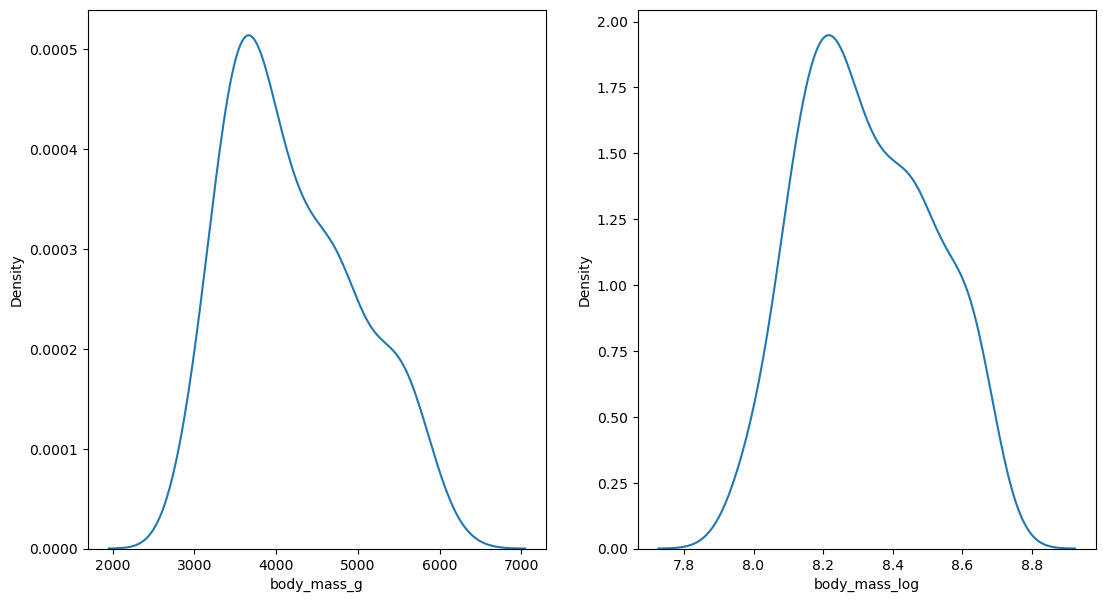

In [39]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,7))
sns.kdeplot(x="body_mass_g", data=log_data, ax=ax1)
sns.kdeplot(x="body_mass_log", data=log_data, ax=ax2)
plt.show()


In [40]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2)

In [41]:
data = pd.read_csv("data/datedata.csv", parse_dates=["ScheduledDay", "AppointmentDay" ])
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       